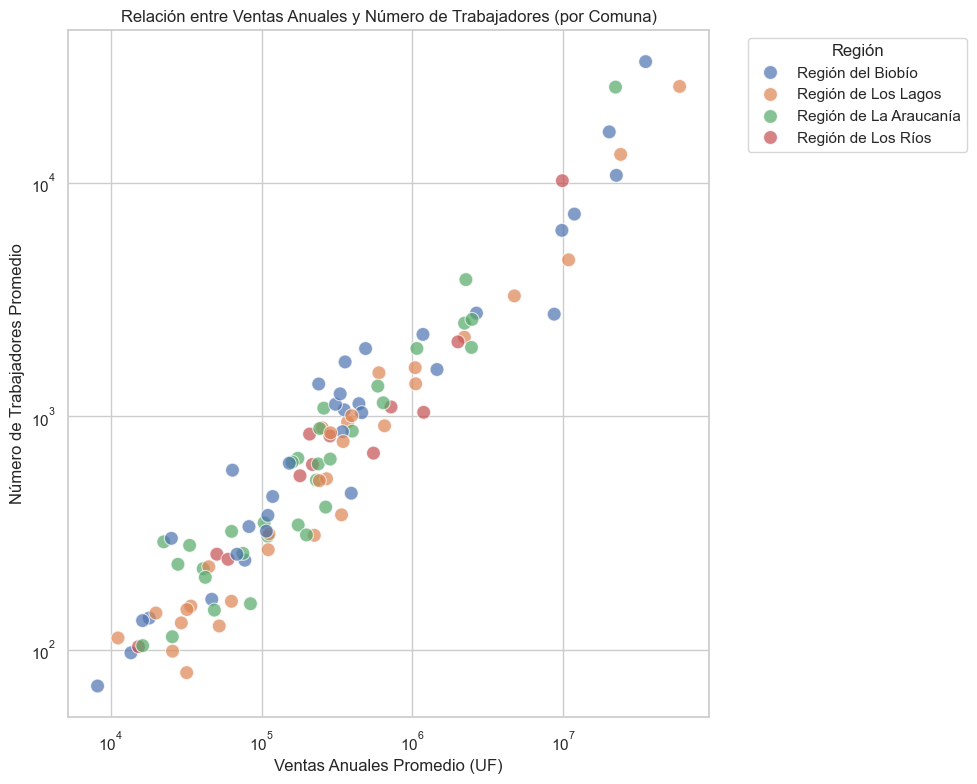

Matriz de Correlación:


,ventas_anuales_en_uf,número_de_trabajadores_dependientes_informados
ventas_anuales_en_uf,1.000000,0.917529
número_de_trabajadores_dependientes_informados,0.917529,1.000000


In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=comuna_stats,
    x='ventas_anuales_en_uf',
    y='número_de_trabajadores_dependientes_informados',
    hue='región_del_domicilio_o_casa_matriz',
    alpha=0.7,
    s=100
)
plt.title('Relación entre Ventas Anuales y Número de Trabajadores (por Comuna)')
plt.xlabel('Ventas Anuales Promedio (UF)')
plt.ylabel('Número de Trabajadores Promedio')
plt.xscale('log') # Escala logarítmica para visualizar mejor las diferencias de magnitud
plt.yscale('log')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calcular correlación
correlation = comuna_stats[['ventas_anuales_en_uf', 'número_de_trabajadores_dependientes_informados']].corr()
print("Matriz de Correlación:")
display(correlation)

## 5. Relación entre Ventas y Empleo

Analizaremos si existe una correlación entre las ventas de una comuna y la cantidad de trabajadores que emplea.

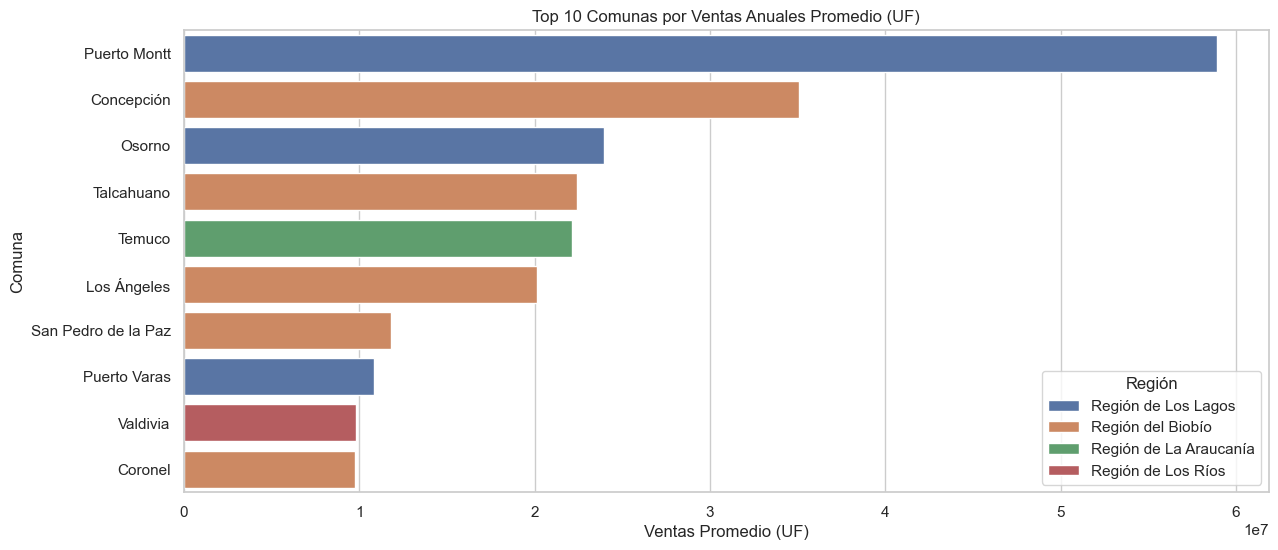

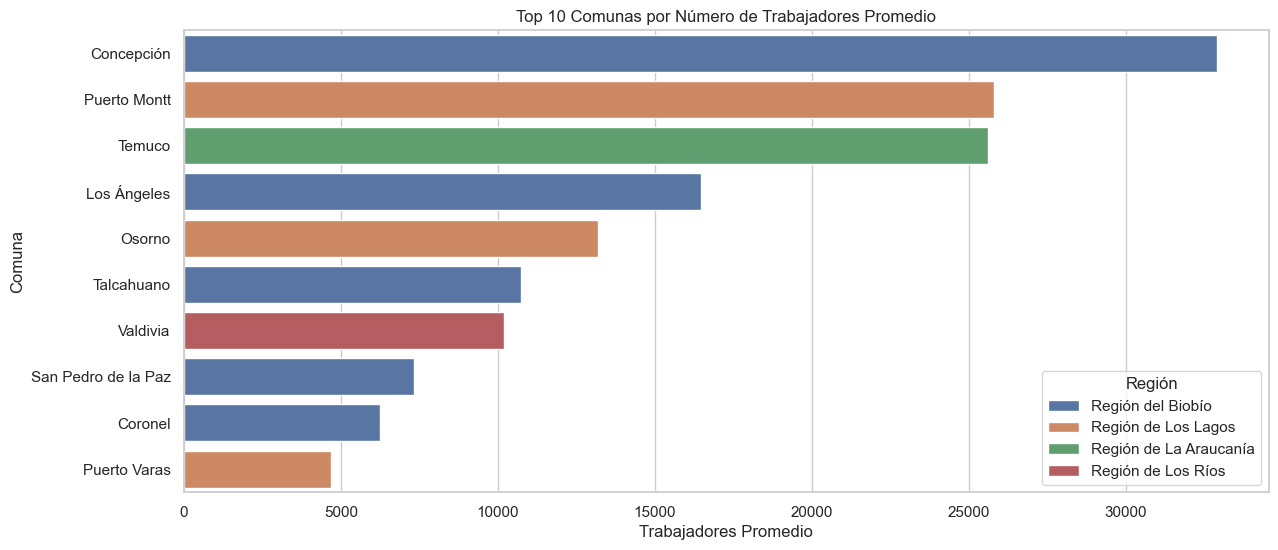

In [ ]:
# Agrupar por comuna y región (sumando todos los años disponibles)
comuna_stats = df_comu_filtered.groupby(['comuna_del_domicilio_o_casa_matriz', 'región_del_domicilio_o_casa_matriz'])[[
    'ventas_anuales_en_uf', 
    'número_de_trabajadores_dependientes_informados'
]].mean().reset_index() # Usamos promedio anual para no sesgar por cantidad de años

# Top 10 Comunas por Ventas Promedio
top_sales_comunas = comuna_stats.nlargest(10, 'ventas_anuales_en_uf')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_sales_comunas,
    x='ventas_anuales_en_uf',
    y='comuna_del_domicilio_o_casa_matriz',
    hue='región_del_domicilio_o_casa_matriz',
    dodge=False
)
plt.title('Top 10 Comunas por Ventas Anuales Promedio (UF)')
plt.xlabel('Ventas Promedio (UF)')
plt.ylabel('Comuna')
plt.legend(title='Región')
plt.show()

# Top 10 Comunas por Trabajadores Promedio
top_workers_comunas = comuna_stats.nlargest(10, 'número_de_trabajadores_dependientes_informados')

plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_workers_comunas,
    x='número_de_trabajadores_dependientes_informados',
    y='comuna_del_domicilio_o_casa_matriz',
    hue='región_del_domicilio_o_casa_matriz',
    dodge=False
)
plt.title('Top 10 Comunas por Número de Trabajadores Promedio')
plt.xlabel('Trabajadores Promedio')
plt.ylabel('Comuna')
plt.legend(title='Región')
plt.show()

## 4. Análisis a Nivel Comunal: Áreas de Mayor Desempeño

Identificaremos las comunas con mayores ventas y mayor cantidad de trabajadores. Para este análisis, sumaremos los valores históricos o consideraremos el promedio anual para tener una visión general.

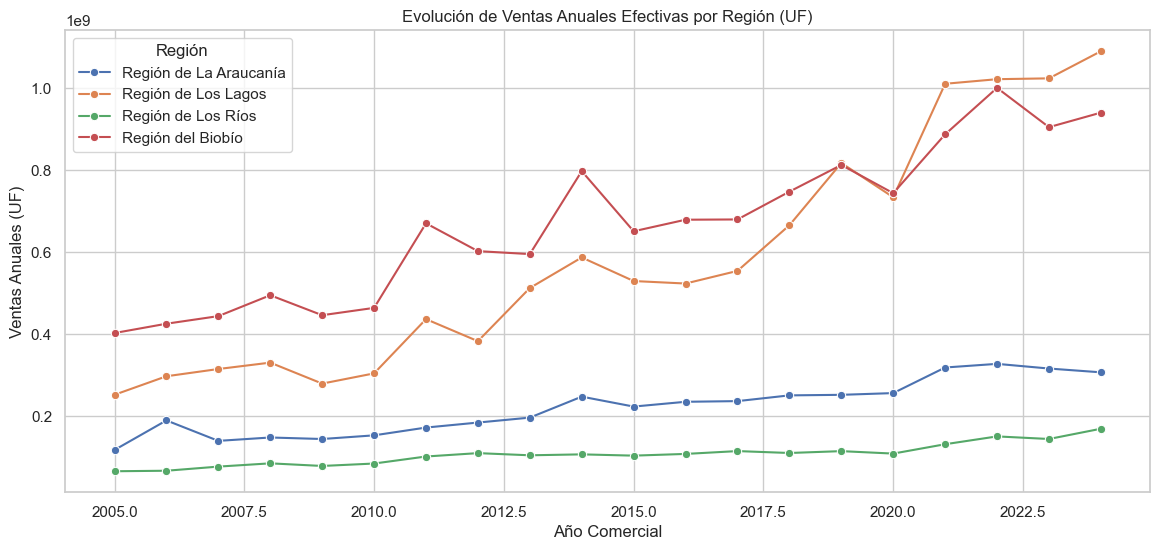

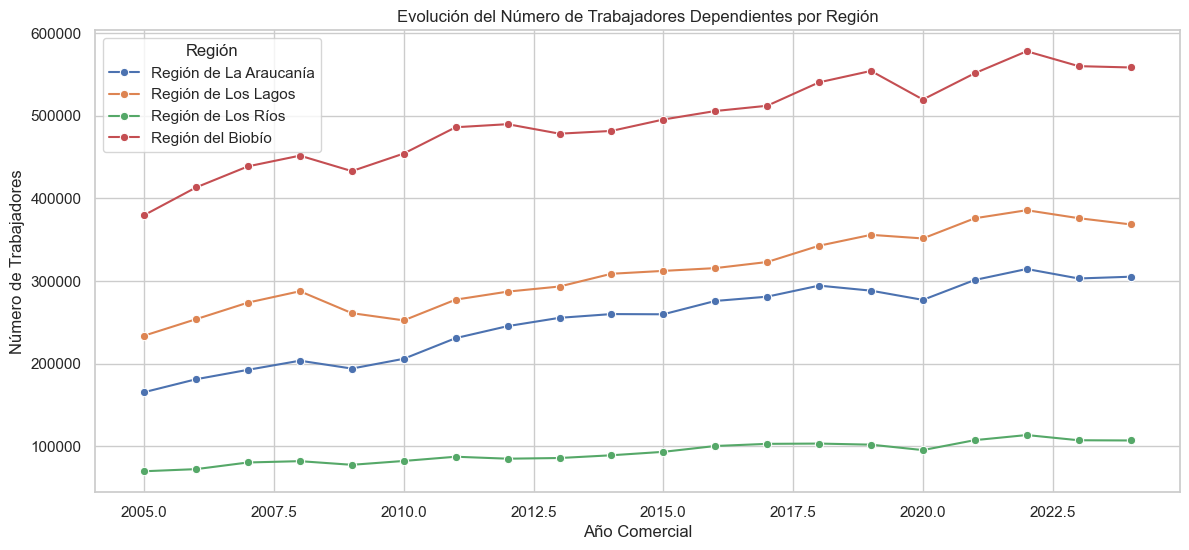

In [3]:
# Agrupar por año y región
regional_trends = df_reg_filtered.groupby(['año_comercial', 'región_del_domicilio_o_casa_matriz'])[[
    'ventas_anuales_en_uf', 
    'número_de_trabajadores_dependientes_informados'
]].sum().reset_index()

# Gráfico de Ventas Anuales
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=regional_trends, 
    x='año_comercial', 
    y='ventas_anuales_en_uf', 
    hue='región_del_domicilio_o_casa_matriz',
    marker='o'
)
plt.title('Evolución de Ventas Anuales Efectivas por Región (UF)')
plt.ylabel('Ventas Anuales (UF)')
plt.xlabel('Año Comercial')
plt.legend(title='Región')
plt.show()

# Gráfico de Número de Trabajadores
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=regional_trends, 
    x='año_comercial', 
    y='número_de_trabajadores_dependientes_informados', 
    hue='región_del_domicilio_o_casa_matriz',
    marker='o'
)
plt.title('Evolución del Número de Trabajadores Dependientes por Región')
plt.ylabel('Número de Trabajadores')
plt.xlabel('Año Comercial')
plt.legend(title='Región')
plt.show()

## 3. Análisis Regional: Tendencias de Ventas y Empleo

Analizaremos la evolución de las ventas anuales y el número de trabajadores por región a lo largo de los años.

In [2]:
# Regiones de interés
TARGET_REGIONS = [
    "Región de Los Lagos",
    "Región de La Araucanía",
    "Región de Los Ríos",
    "Región del Biobío"
]

def clean_numeric_column(df, col_name):
    """Convierte una columna a numérico, forzando errores a NaN y llenando con 0."""
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0)
    return df

def filter_and_clean(df, region_col):
    # Filtrar por región
    df_filtered = df[df[region_col].isin(TARGET_REGIONS)].copy()
    
    # Limpiar columnas numéricas clave si existen
    if 'ventas_anuales_en_uf' in df_filtered.columns:
        df_filtered = clean_numeric_column(df_filtered, 'ventas_anuales_en_uf')
    
    if 'número_de_trabajadores_dependientes_informados' in df_filtered.columns:
        df_filtered = clean_numeric_column(df_filtered, 'número_de_trabajadores_dependientes_informados')
        
    return df_filtered

# Aplicar filtros y limpieza
df_reg_filtered = filter_and_clean(df_tram5_reg, 'región_del_domicilio_o_casa_matriz')
df_comu_filtered = filter_and_clean(df_tram5_comu, 'región_del_domicilio_o_casa_matriz')

print(f"Registros filtrados (Regional): {df_reg_filtered.shape}")
print(f"Registros filtrados (Comunal): {df_comu_filtered.shape}")
print("\nEjemplo de datos filtrados (Regional):")
display(df_reg_filtered.head())

Registros filtrados (Regional): (400, 23)
Registros filtrados (Comunal): (10054, 25)

Ejemplo de datos filtrados (Regional):


,año_comercial,tramo_según_ventas_5_tramos,región_del_domicilio_o_casa_matriz,número_de_empresas,ventas_anuales_en_uf,número_de_trabajadores_dependientes_informados,renta_neta_informada_en_uf,trabajadores_ponderados_por_meses_trabajados,número_de_trabajadores_dependientes_de_género_femenino_informados,trabajadores_de_género_femenino,...,trabajadores_de_género_masculino_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_informados,honorarios_pagados_informados_en_uf,trabajadores_a_honorarios_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_de_género_femenino_informados,honorarios_pagados_informados_a_trabajadores_de_género_femenino_en_uf,trabajadores_a_honorarios_de_género_femenino_ponderados_por_meses_trabajados,número_de_trabajadores_a_honorarios_de_género_masculino_informados,honorarios_pagados_informados_a_trabajadores_de_género_masculino_en_uf,trabajadores_a_honorarios_de_género_masculino_ponderados_por_meses_trabajados
8,2005,Sin Ventas/Sin Información,Región del Biobío,10310,0.00,35942,7639259.814310817,29963.496341,21773,4.640216e+06,...,11484.915033,10688,623995.7216618317,0.0,5257,291608.6626570617,0.0,5431,332117.6544568766,0.0
9,2005,Sin Ventas/Sin Información,Región de La Araucanía,6443,0.00,9519,1913974.211912144,7725.332208,4951,1.042287e+06,...,3547.249361,4317,250276.2817087187,0.0,1642,86004.3159067262,0.0,2675,164120.6835179967,0.0
10,2005,Sin Ventas/Sin Información,Región de Los Lagos,5897,0.00,6151,1009495.689137435,4803.999110,2827,5.268899e+05,...,2458.916138,2556,110550.5901422779,0.0,967,38279.1279221199,0.0,1589,72269.7732644534,0.0
14,2005,Sin Ventas/Sin Información,Región de Los Ríos,2626,0.00,2316,407308.594302721,1902.083068,1178,2.295500e+05,...,915.249868,1150,81170.234666078,0.0,490,22556.9832368296,0.0,660,58613.2536356727,0.0
25,2005,Micro,Región del Biobío,45092,21700540.42,38211,3092522.244857363,22674.158221,13851,1.483091e+06,...,13023.160693,39213,823737.2647668266,0.0,19446,357021.1067562328,0.0,19767,465929.7352524149,0.0


## 2. Limpieza y Filtrado de Datos

Filtraremos los datos para incluir solo las regiones de interés:
- Región de Los Lagos
- Región de La Araucanía
- Región de Los Ríos
- Región del Biobío

También nos aseguraremos de que las columnas numéricas sean tratadas correctamente, convirtiendo valores no numéricos (como `*`) a `NaN` o `0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Rutas de los archivos
DATA_DIR = "../data/processed"
FILE_REG_TRTRAB = os.path.join(DATA_DIR, "clean_PUB_REG_TRTRAB.csv")
FILE_TRAM5_REG = os.path.join(DATA_DIR, "clean_PUB_TRAM5_REG.csv")
FILE_TRAM5_COMU = os.path.join(DATA_DIR, "clean_PUB_TRAM5_COMU.csv")

# Cargar datasets
df_reg_trtrab = pd.read_csv(FILE_REG_TRTRAB)
df_tram5_reg = pd.read_csv(FILE_TRAM5_REG)
df_tram5_comu = pd.read_csv(FILE_TRAM5_COMU)

print("Datos cargados exitosamente.")
print(f"Registros en REG_TRTRAB: {df_reg_trtrab.shape}")
print(f"Registros en TRAM5_REG: {df_tram5_reg.shape}")
print(f"Registros en TRAM5_COMU: {df_tram5_comu.shape}")

Datos cargados exitosamente.
Registros en REG_TRTRAB: (1676, 23)
Registros en TRAM5_REG: (1689, 23)
Registros en TRAM5_COMU: (32650, 25)


# Análisis de Ventas y Empleo en Regiones del Sur de Chile

Este notebook analiza las ventas efectivas y el número de trabajadores de empresas en las regiones de Los Lagos, La Araucanía, Los Ríos y Biobío. Se utiliza información a nivel regional y comunal.

## 1. Importar Librerías y Cargar Datos